## Comparison of ML with Traditional Programming

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mp

In [3]:
df = pd.read_csv("kc_housing_data.csv")

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,291.851724,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,827.759761,437.822440,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.tail(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,507250,3,2.50,2270,5536,2.0,NO,NONE,Average,8 Good,2270,0.0,2003,0,98065,47.5389,-121.881,2270,5731
21588,429000,3,2.00,1490,1126,3.0,NO,NONE,Average,8 Good,1490,0.0,2014,0,98144,47.5699,-122.288,1400,1230
21589,610685,4,2.50,2520,6023,2.0,NO,NONE,Average,9 Better,2520,0.0,2014,0,98056,47.5137,-122.167,2520,6023
21590,1010000,4,3.50,3510,7200,2.0,NO,NONE,Average,9 Better,2600,910.0,2009,0,98136,47.5537,-122.398,2050,6200
21591,475000,3,2.50,1310,1294,2.0,NO,NONE,Average,8 Good,1180,130.0,2008,0,98116,47.5773,-122.409,1330,1265
21592,360000,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,0,98103,47.6993,-122.346,1530,1509
21593,400000,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,0,98146,47.5107,-122.362,1830,7200
21594,402101,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,0,98144,47.5944,-122.299,1020,2007
21595,400000,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,0,98027,47.5345,-122.069,1410,1287
21596,325000,2,0.75,1020,1076,2.0,NO,NONE,Average,7 Average,1020,0.0,2008,0,98144,47.5941,-122.299,1020,1357


<AxesSubplot:>

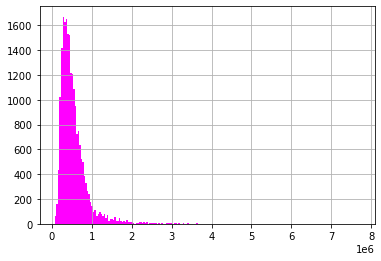

In [12]:
df["price"].hist(bins=200, color = "magenta")

In [32]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
df.dtypes

price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [40]:
df['view'].describe()

count     21597
unique        5
top        NONE
freq      19485
Name: view, dtype: object